* This notebook was made to do some statistics of to which degree each forcing mechanism contribute to the vertical mixing in different plume region.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (
    nc_tools,
    viz_tools,
    tidetools,
)
import datetime, os
from glob import glob
from nowcast import figures
import matplotlib.pyplot as plt
import matplotlib as mpl
import pytz
from R_mixStuff import sites
import R_mixStuff as RS
mpl.rcParams.update({'font.size': 24})
mpl.rcParams["axes.formatter.useoffset"] = False
%matplotlib inline

/home/jieliu/anaconda3/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

In [3]:
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [4]:
## load salinity into a dict
paths = ['Oct2014OnlyRiver','Oct2014notides','Oct2014nowind','Oct2014nof','Oct2014combineall']
base='/data/jieliu/MEOPAR/SurfaceCurrent/'
file_pattern = 'oct2014*_T.nc'
S = {}
for pa in paths:
    path = glob(os.path.join(base,pa, file_pattern))
    f = nc.Dataset(path[0],'r');
    S[pa] = f.variables['vosaline']

In [5]:
def aveRmix_tiloc(S,t,np_mask,dep_ind,site):
    """This function was made to get the averaged Rmix over 
    a period and at one site"""
    S_ave = {}; rmix_po = {}
    for pa in paths:
        S_ave[pa] = np.nanmean(S[pa][t:],axis=0) ## average over a period
        rmix = RS.R_mix(S_ave[pa],t,np_mask,dep_ind,string='ave')
        rmix_po[pa] = rmix[sites[site]['j'],sites[site]['i']] ## select the location point
    return rmix_po

In [12]:
def plot_diagram(rmix_po,site):
    """This function was made to plot the 
    diagram at each specific location"""
    fig, ax = plt.subplots(1,1,figsize = (12,4))
    wid = .65
    ind = np.arange(len(paths))
    pas = []
    for i,pa in zip(ind,paths):
        barlist=ax.bar(i,rmix_po[pa],align='center',width = wid)
        barlist[0].set_color('g')
        pas.append(pa)
    ax.set_xticks(ind)
    ax.set_xticklabels([pas[0], pas[1], pas[2], pas[3],pas[4]])
    ax.set_ylabel('Rmix at '+site)
    ax.set_ylim([0,1])
    fig.autofmt_xdate()
    return fig

In [7]:
rpo_mouth = aveRmix_tiloc(S,625,np_mask,4,'mouth')
rpo_near = aveRmix_tiloc(S,625,np_mask,4,'near field')
rpo_far = aveRmix_tiloc(S,625,np_mask,4,'VENUS Central')

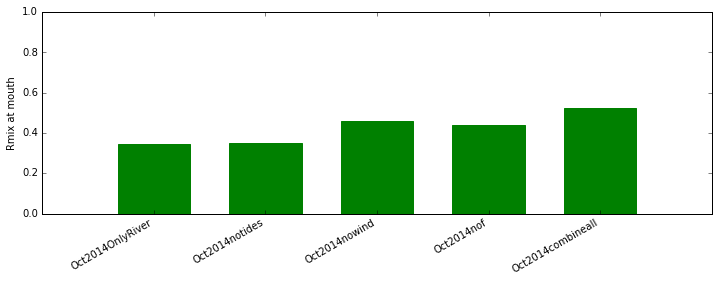

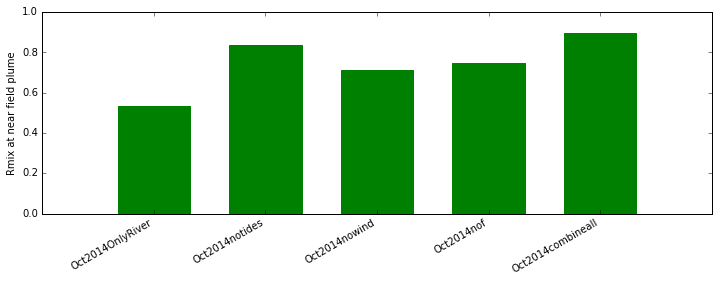

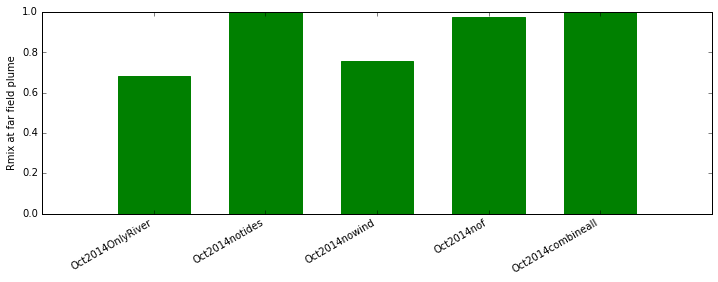

In [13]:
fig = plot_diagram(rpo_mouth,'mouth')
fig = plot_diagram(rpo_near,'near field plume')
fig = plot_diagram(rpo_far,'far field plume')